In [1]:
#Import Required modules

import datetime
import pandas as pd
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['font.size'] = 8
from skimage import img_as_float
from skimage import exposure
import plotly.graph_objects as go


import os
import glob
import random
from skimage import io # To preprocess the images
from distutils.file_util import copy_file
import seaborn as sns
import cv2
import keras
from keras.models import load_model
from keras import backend as K
import tensorflow as tf

from skimage.transform import rescale
from keras_preprocessing.image import ImageDataGenerator

import warnings
warnings.simplefilter('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


LINK TO DATASET : 

https://www.kaggle.com/tawsifurrahman/covid19-radiography-database

In [3]:
# Loading Dataset
ds_dir = r'/content/drive/MyDrive/Colab_Notebooks/Data/COVID-19_Radiography_Dataset'
dt_dir = r'/content/drive/MyDrive/Colab_Notebooks/Data/Dataset_covid'

In [ ]:
#@title Pre Processing & Data Augmentation


In [4]:
# Creating array classes
cls_ori = ['COVID', 'Normal', 'Lung_Opacity', 'Viral Pneumonia']
cls = ['Covid', 'Normal','Lung','Viral']

In [5]:
# Number of images in each category

covid_cls_ori = [fn for fn in os.listdir(f'{ds_dir}/COVID') if fn.endswith('.png')]
noncovid_cls_ori = [fn for fn in os.listdir(f'{ds_dir}/Lung_Opacity') if fn.endswith('.png')]
normal_cls_ori = [fn for fn in os.listdir(f'{ds_dir}/Normal') if fn.endswith('.png')]
viral_cls_ori = [fn for fn in os.listdir(f'{ds_dir}/Viral Pneumonia') if fn.endswith('.png')]

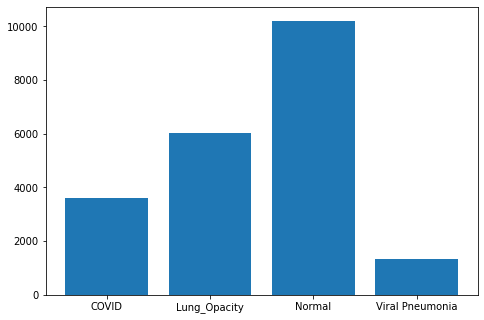

Total Number of Images: 21185
COVID: 3616
Lung_Opacity: 6012
Normal: 10212
Other Viral Pneumonia: 1345


In [6]:
# Plotting bar chart of each class
barchart = plt.figure()
ax = barchart.add_axes([0,0,1,1])
Each_class = ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']
image_count = [len(covid_cls_ori),
               len(noncovid_cls_ori),
               len(normal_cls_ori),
               len(viral_cls_ori)]

ax.bar(Each_class,image_count)
plt.show()

# Printing the numbers for each class
print("Total Number of Images:",len(normal_cls_ori)+len(covid_cls_ori)+len(noncovid_cls_ori)+len(viral_cls_ori))
print("COVID:",len(covid_cls_ori))
print("Lung_Opacity:",len(noncovid_cls_ori))
print("Normal:",len(normal_cls_ori))
print("Other Viral Pneumonia:",len(viral_cls_ori))

In [7]:
# Number of images in each category
covid_cls = [fn for fn in os.listdir(f'{dt_dir}/Covid') if fn.endswith('.png')]
noncovid_cls = [fn for fn in os.listdir(f'{dt_dir}/Lung') if fn.endswith('.png')]
normal_cls = [fn for fn in os.listdir(f'{dt_dir}/Normal') if fn.endswith('.png')]
viral_cls = [fn for fn in os.listdir(f'{dt_dir}/Viral') if fn.endswith('.png')]

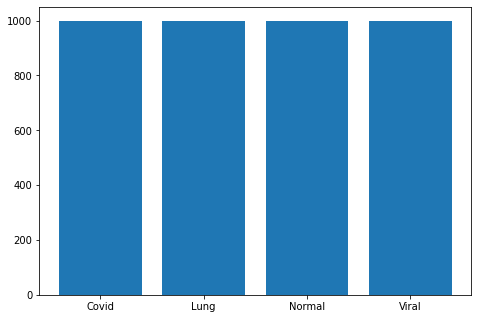

Total Number of Images: 4000
COVID: 1000
Lung_Opacity: 1000
Normal: 1000
Other Viral Pneumonia: 1000


In [8]:
# Plotting bar chart of each class
barchart = plt.figure()
ax = barchart.add_axes([0,0,1,1])
Each_class = ['Covid', 'Lung', 'Normal', 'Viral']
image_count = [len(covid_cls),
               len(noncovid_cls),
               len(normal_cls),
               len(viral_cls)]
               
ax.bar(Each_class,image_count)
plt.show()

# Print Numbers
print("Total Number of Images:",len(normal_cls)+len(covid_cls)+len(noncovid_cls)+len(viral_cls))
print("COVID:",len(covid_cls))
print("Lung_Opacity:",len(noncovid_cls))
print("Normal:",len(normal_cls))
print("Other Viral Pneumonia:",len(viral_cls))

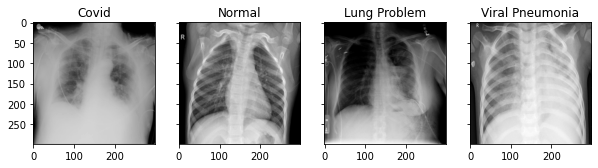

In [9]:
# Plotting an image from each class

covid_path = os.path.join(dt_dir, cls[0], '*')
covid = glob.glob(covid_path)
covid = io.imread(covid[0])

normal_path = os.path.join(dt_dir, cls[1], '*')
normal = glob.glob(normal_path)
normal = io.imread(normal[0])

lung_path = os.path.join(dt_dir, cls[2], '*')
lung = glob.glob(lung_path)
lung = io.imread(lung[0])

viral_path = os.path.join(dt_dir, cls[3], '*')
viral = glob.glob(viral_path)
viral = io.imread(viral[0])

f, axes = plt.subplots(1, 4, sharey=True)
f.set_figwidth(10)

axes[0].imshow(covid, cmap='gray')
axes[0].title.set_text('Covid')

axes[1].imshow(normal, cmap='gray')
axes[1].title.set_text('Normal')

axes[2].imshow(lung, cmap='gray')
axes[2].title.set_text('Lung Problem')

axes[3].imshow(viral, cmap='gray')
axes[3].title.set_text('Viral Pneumonia')

In [10]:
# Loading Training and Testing dataset
DS_train = r'/content/drive/MyDrive/Colab_Notebooks/Data/Train'
DS_test = r'/content/drive/MyDrive/Colab_Notebooks/Data/Test'

In [12]:
# Setting up input size and batch size
batch_size=32
img_width=224
img_height=224



w_datagen_args = dict(  rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = False,
    shear_range = 0.2,
    zoom_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    fill_mode = 'nearest',
    validation_split=0.2)


# Define ImageDataGenerators
w_datagen = ImageDataGenerator(**w_datagen_args)

#Print data augmentation data
print('------------------------------------------')
print('Train Set With Data Augmentation:')
w_train_generator = w_datagen.flow_from_directory(DS_train,target_size=(img_height,img_width),
                                            batch_size=batch_size,interpolation="lanczos",shuffle=True,subset='training')
print('------------------------------------------')
print("\nValidation Set:")
wo_validation_generator = wo_datagen.flow_from_directory(DS_train,target_size=(img_height,img_width),
                                            batch_size=batch_size,interpolation="lanczos",shuffle=True,subset='validation')

print("\nTest Set:")
test_generator = wo_datagen.flow_from_directory(DS_test,target_size=(img_height,img_width),
                                            batch_size=800,interpolation="lanczos")

------------------------------------------
Train Set With Data Augmentation:
Found 2560 images belonging to 4 classes.
------------------------------------------

Validation Set:
Found 640 images belonging to 4 classes.

Test Set:
Found 800 images belonging to 4 classes.


In [13]:
# Mapping classes to Index
class_map = {v:k for k,v in test_generator.class_indices.items()}
print(class_map)

{0: 'Covid', 1: 'Lung', 2: 'Normal', 3: 'Viral'}


In [14]:
# Calling 1 batch from Data and separate it as x and y
x, y = next(w_train_generator)

# Print information of one batch
print("Information for each batch:")

print('x: ',x.shape)
print('y: ',y.shape)

Information for each batch:
x:  (32, 224, 224, 3)
y:  (32, 4)


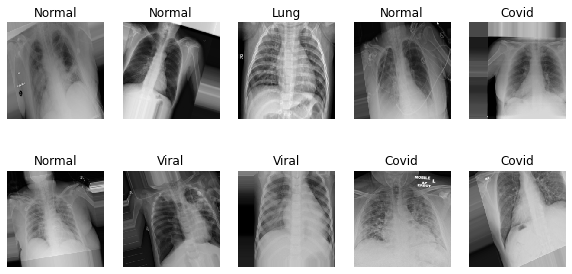

In [15]:
plt.figure(figsize=(10, 5))
for index, image in enumerate(x[:10]):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis("off")
    plt.title(cls[np.argmax(y[index])], fontsize=12)

In [ ]:
#@title Modelling


**Experiments with VGG16 Transfer Learning Via Feature Extraction**

All experiments are conducted with the batch size of 32 and learning steps per epoch of 80

 a) Learning rate = 0.001 vs 0.0001

 b) Epcohs = 30 vs 50

 c) Optimizer = RMSprop vs Adam


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, AveragePooling2D,MaxPooling2D, Dropout, BatchNormalization, Conv2D
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

In [17]:
# Building Custom Sequential Model
# each layer with the dropout of 0.2

def my_model(input_size):
    keras.backend.clear_session()
    
    model = Sequential()
    # Layer 1 of Convolution with average pooling (32, 3 x 3 kernal)
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(input_size)))
    model.add(AveragePooling2D())
    
    # Layer 2 of Convolution with average pooling (32, 3 x 3 kernal)
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(AveragePooling2D())
    
    # Flatten output of covolutional layer
    model.add(Flatten())
    
    # Layer 1 fully connected
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    
    # Layer 2 fully connected
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    
    # Layer 3 fully connected
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    
    # Output layer
    model.add(Dense(4, activation='softmax'))
    
    return model

**Experiment 1:**

optimizer = RMSprop

Learning rate = 0.001

epochs = 30


In [19]:
# Build and compile simple Custom Sequential Model

# For training with augmented images
w_model = my_model(
    
    # image size (224, 224, 3)
    (img_width,img_height,3)

    )
w_model.compile(
    
    # Loss Function
    loss="categorical_crossentropy",

    # Optimizer and Learning Rate 
    optimizer=RMSprop(learning_rate=0.001), 

    # Define Metric
    metrics=["accuracy"]
    
    )

# Print model summary
w_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
average_pooling2d (AveragePo (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
average_pooling2d_1 (Average (None, 54, 54, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 93312)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               23888128  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

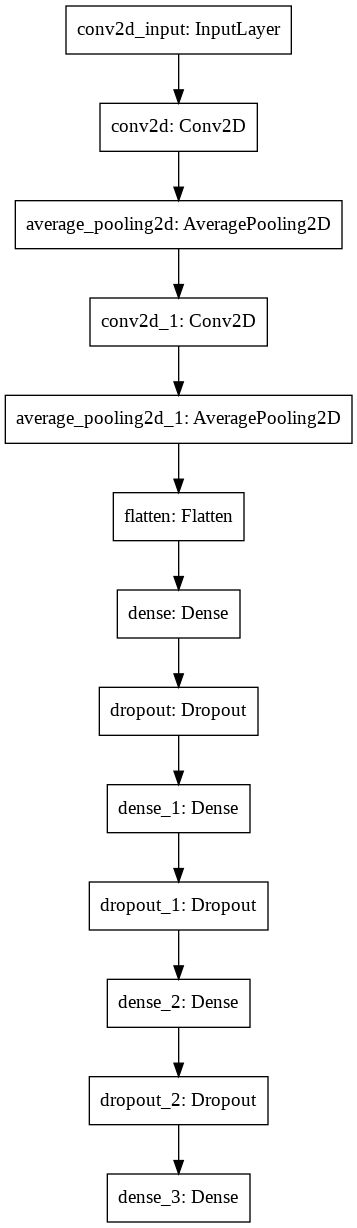

In [20]:
# Plotting the model for Visualizing
tf.keras.utils.plot_model(w_model)

Experiment 1:


In [ ]:
import math
import time

print('-------------------With Augmentation----------------------')
Start = time.time()
w_history = w_model.fit(w_train_generator, 
                        steps_per_epoch= math.ceil(wo_train_generator.samples//batch_size),
                        validation_data = wo_validation_generator,
                        epochs=epochs, 
                        verbose=1)
Stop = time.time()
print('Time taken:',Stop - Start)

-------------------With Augmentation----------------------
Epoch 1/30
80/80 [==============================] - 117s 1s/step - loss: 1.1796 - accuracy: 0.4504 - val_loss: 0.8641 - val_accuracy: 0.6156
Epoch 2/30
80/80 [==============================] - 102s 1s/step - loss: 1.0723 - accuracy: 0.5555 - val_loss: 0.8962 - val_accuracy: 0.6344
Epoch 3/30
80/80 [==============================] - 101s 1s/step - loss: 1.0693 - accuracy: 0.5859 - val_loss: 0.9005 - val_accuracy: 0.6125
Epoch 4/30
80/80 [==============================] - 100s 1s/step - loss: 0.9799 - accuracy: 0.6211 - val_loss: 0.8332 - val_accuracy: 0.6516
Epoch 5/30
80/80 [==============================] - 100s 1s/step - loss: 0.8799 - accuracy: 0.6582 - val_loss: 1.1346 - val_accuracy: 0.6234
Epoch 6/30
80/80 [==============================] - 100s 1s/step - loss: 0.9331 - accuracy: 0.6340 - val_loss: 0.7538 - val_accuracy: 0.6609
Epoch 7/30
80/80 [==============================] - 100s 1s/step - loss: 0.9030 - accuracy: 0.6

In [ ]:
w_model.save('my_model_1.h5')

In [43]:
# Define function to plot graph
def compare(model_list,model_label):
    acc = []
    val_acc = []
    loss = []
    val_loss = []
    # Gathering the history from each model
    for model in model_list:
        acc.append(model.history['accuracy'])
        val_acc.append(model.history['val_accuracy'])
        loss.append(model.history['loss'])
        val_loss.append(model.history['val_loss'])

    # Plot the accuracy side by side
    fig = plt.figure(figsize=(len(model_list)*5,5))
    fig.suptitle('Accuracy', fontsize=16)
    for index,value in enumerate(acc):
        plt.subplot(1, len(model_list), index+1)
        plt.plot(acc[index], label='Train')
        plt.plot(val_acc[index], label='Valid')
        plt.ylim(0,1)
        plt.xlabel('epoch')
        plt.title(model_label[index])
        plt.legend()
    plt.show()
    
    # Plot the loss side by side
    fig = plt.figure(figsize=(len(model_list)*5,5))
    fig.suptitle('Loss', fontsize=16)
    for index,value in enumerate(loss):
        plt.subplot(1, len(model_list), index+1)
        plt.plot(loss[index], label='Train')
        plt.plot(val_loss[index], label='Valid')
        plt.xlabel('epoch')
        plt.title(model_label[index])
        plt.legend()
    plt.show()

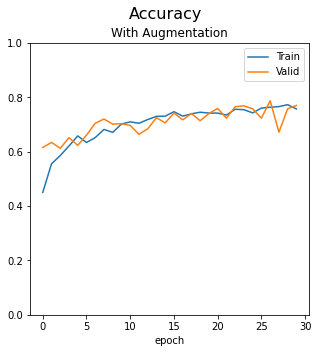

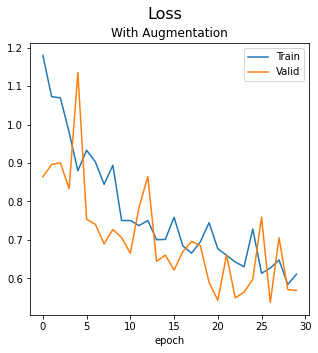

In [ ]:
# Comparison of Augmentation and Non Augmented images 
model_hist = [w_history]

# Model Label
model_lbl = ['With Augmentation', 'With Augmentation']

# Plot graph
compare(model_hist, model_lbl)

In [ ]:
# Comment: Without data augmentation, the model tends to overfit due to lack of variations in dataset. From the graph (without augmentation), loss starts to increase around 12th epoch.

In [ ]:
# Testing model with test dataset

print('With Augmentation:')
w_model.evaluate(test_generator)

With Augmentation:
1/1 [==============================] - 12s 12s/step - loss: 1.0496 - accuracy: 0.7113


[1.0495800971984863, 0.7112500071525574]

In [ ]:
# Call for the test dataset and divide it into x_test and y_test
x_test, y_test = next(test_generator)

In [ ]:
# Predict the y using x_test
test_result = w_model.predict(x_test)

In [ ]:
# Construct predicted y and actual y in python list
y_pred = []
for i in range(len(test_result)):
    y_pred.append(np.argmax(test_result[i]))
y_act = []
for i in range(len(y_test)):
    y_act.append(np.argmax(y_test[i]))

In [ ]:
# Demonstrate the confusion matrix of the predicted vs actual 
from sklearn import metrics
cm = metrics.confusion_matrix(y_act, y_pred)
print(cm,'\n')
print(metrics.classification_report(y_act, y_pred,target_names=cls))

[[183  16   0   1]
 [ 78 116   3   3]
 [ 48  14 129   9]
 [  1   8  50 141]] 

              precision    recall  f1-score   support

       Covid       0.59      0.92      0.72       200
      Normal       0.75      0.58      0.66       200
        Lung       0.71      0.65      0.68       200
       Viral       0.92      0.70      0.80       200

    accuracy                           0.71       800
   macro avg       0.74      0.71      0.71       800
weighted avg       0.74      0.71      0.71       800



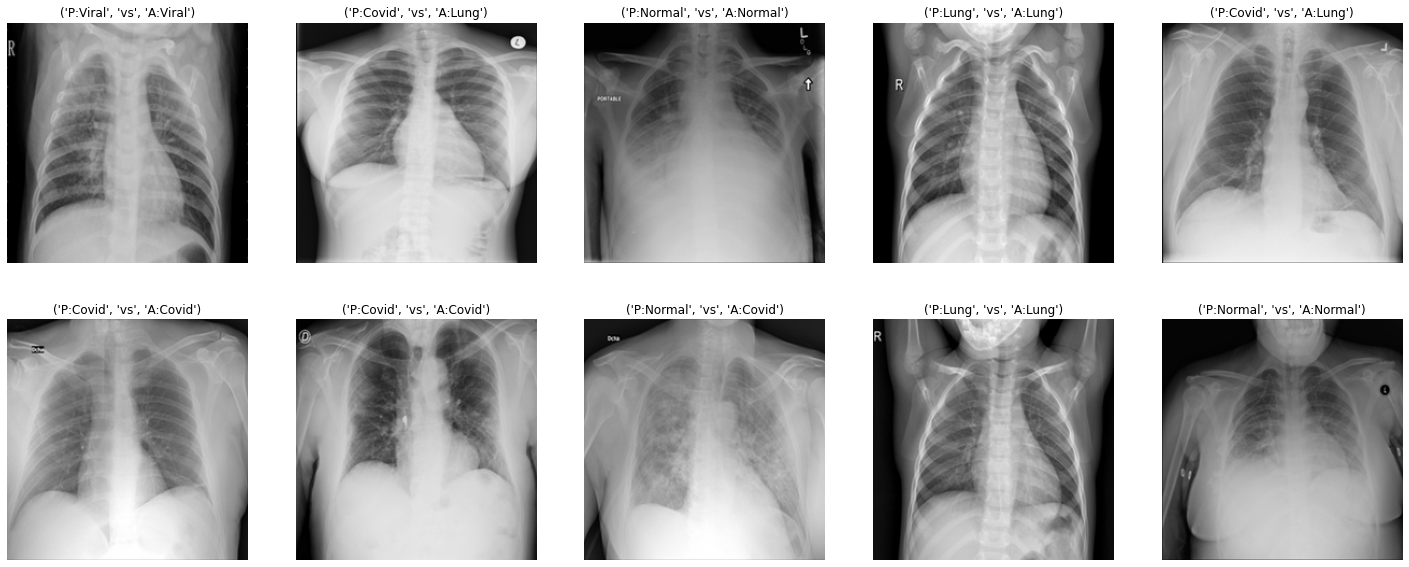

In [ ]:
# Checking on some Testing data visualization for prediction correct or wrong
plt.figure(figsize=(25, 10))
for index, image in enumerate(x_test[:10]):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    plt.title(('P:' + cls[y_pred[index]],'vs','A:'+ cls[y_act[index]]))

**Visualization the output of convolution layer**

In [ ]:
# Image path to display from dataset
img_path = r'/content/drive/MyDrive/Colab_Notebooks/Data/Dataset_covid/Covid/COVID-1.png'

# pre processing image in 4D tensor
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(img_width, img_height))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)


(1, 224, 224, 3)


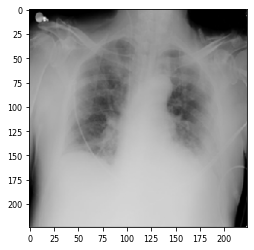

In [ ]:
# Plot the input image with scales
plt.imshow(img_tensor[0])
plt.show()

In [ ]:
from keras import models

# Extraction of top 8 layers outputs
output_layers = [layer.output for layer in wo_model.layers[:4]]

# Creating a model that will return outputs, given the model input:
activ_model = models.Model(
    inputs = wo_model.input, 
    outputs = output_layers)

In [ ]:
# Returning 4 arrays per activation 1 layer
activation = activ_model.predict(img_tensor)

In [ ]:
# Choosing 1st layer as activation layer'
first_layer_activ = activation[0]
print(first_layer_activ.shape)

(1, 222, 222, 32)


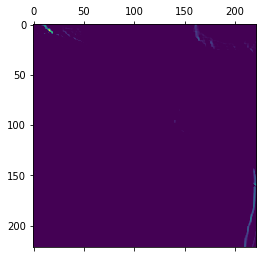

In [ ]:
# Printing 1st layer
plt.matshow(first_layer_activ[0, :, :, 0], cmap='viridis')
plt.show()

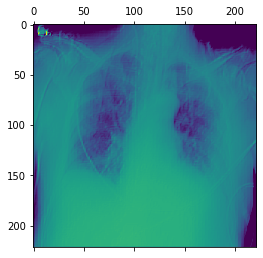

In [ ]:
# 1st layer with kernal 28
plt.matshow(first_layer_activ[0, :, :, 28], cmap='viridis')
plt.show()

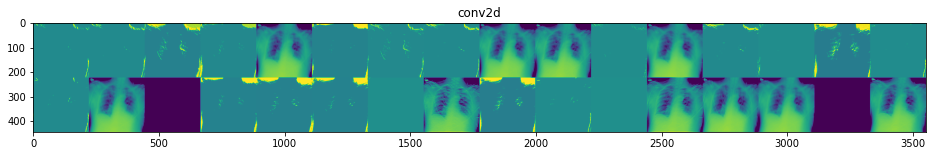

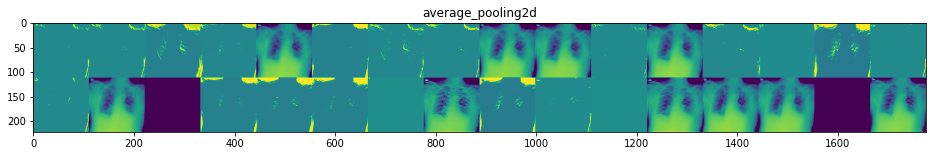

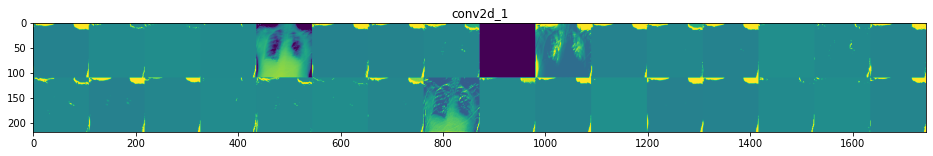

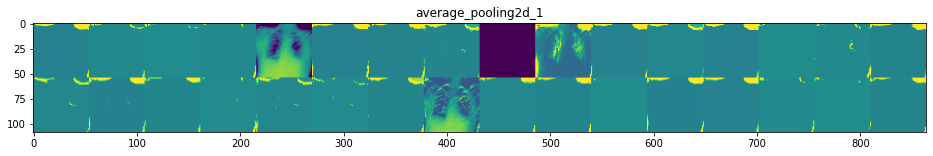

In [ ]:
# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in w_model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activ in zip(layer_names, activation):
    # This is the number of features in the feature map
    n_features = layer_activ.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activ.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activ[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

In [ ]:
#@title HyperParameter Tuning


In [ ]:
#@title 1 - Learning Rate (0.001 vs 0.0001)



**Experiment 2:**

Epochs = 30

Learning rate = 0.0001

optimizer = RMSprop

In [ ]:
# Build Model using RMSprop with 0.0001 Learning rate
w_model_hl = my_model(
    
    # Image size (224, 224, 3)
    (img_width,img_height,3)
    
    )

# Run Model (Custom Sequential)
w_model_hl.compile(
    
    # Loss Function
    loss="categorical_crossentropy", 

    # Optimizer and Learning Rate
    optimizer=RMSprop(learning_rate=0.0001), 

    # Define Metric
    metrics=["accuracy"]
    
    )

In [ ]:
# Specify number of epoch & training and validation process
epochs = 30
print('-------------------Learning Rate = 0.0001 ----------------------')

Start = time.time()
w_hl_history = w_model_hl.fit(w_train_generator, 
                           steps_per_epoch= math.ceil(w_train_generator.samples//batch_size),validation_data = wo_validation_generator,
                           epochs=epochs, verbose=1)
Stop = time.time()
print('Time taken:',Stop - Start)

-------------------Learning Rate = 0.0001 ----------------------
Epoch 1/30
80/80 [==============================] - 105s 1s/step - loss: 1.3211 - accuracy: 0.3551 - val_loss: 1.0128 - val_accuracy: 0.5234
Epoch 2/30
80/80 [==============================] - 105s 1s/step - loss: 1.1256 - accuracy: 0.4535 - val_loss: 0.9308 - val_accuracy: 0.4594
Epoch 3/30
80/80 [==============================] - 104s 1s/step - loss: 1.0649 - accuracy: 0.4922 - val_loss: 0.8205 - val_accuracy: 0.5828
Epoch 4/30
80/80 [==============================] - 102s 1s/step - loss: 1.0331 - accuracy: 0.5074 - val_loss: 0.8104 - val_accuracy: 0.6766
Epoch 5/30
80/80 [==============================] - 103s 1s/step - loss: 0.9823 - accuracy: 0.5430 - val_loss: 0.7622 - val_accuracy: 0.6938
Epoch 6/30
80/80 [==============================] - 104s 1s/step - loss: 0.9385 - accuracy: 0.5652 - val_loss: 0.8940 - val_accuracy: 0.5500
Epoch 7/30
80/80 [==============================] - 107s 1s/step - loss: 0.9302 - accurac

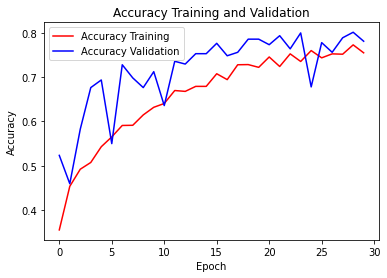

In [ ]:
plt.plot(w_hl_history.history['accuracy'], 'r', label='Accuracy Training')
plt.plot(w_hl_history.history['val_accuracy'], 'b', label='Accuracy Validation')
plt.title('Accuracy Training and Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.show()

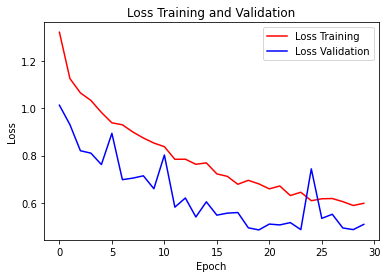

In [ ]:
# Plotting training loss and validation loss
plt.plot(w_hl_history.history['loss'], 'r', label='Loss Training')
plt.plot(w_hl_history.history['val_loss'], 'b', label='Loss Validation')
plt.title('Loss Training and Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.show()

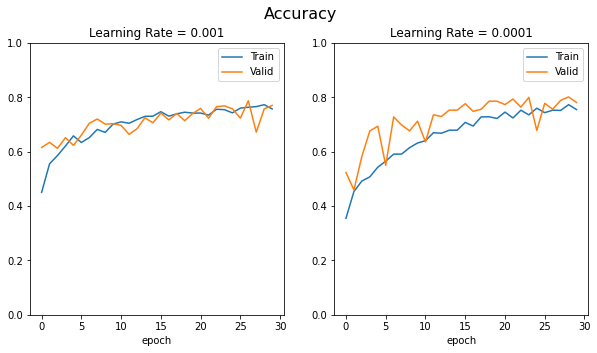

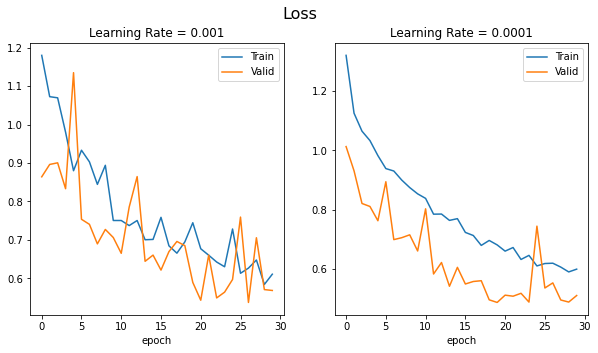

In [ ]:
# Learning rate 0.001 vs Learning rate 0.0001
# Model History
model_lr = [w_history, w_hl_history]
# Model Label
model_lr_l = ['Learning Rate = 0.001','Learning Rate = 0.0001']
# Plot graph
compare(model_lr,model_lr_l)

In [ ]:
#@title Using Adam Optimizer


**Experiment 3:**

epochs = 50

learning rate = 0.0001

optimizer = Adam

In [ ]:
# Build Model using RMSprop with 0.0001 Learning rate

w_model_op = my_model((img_width,
                       img_height, 
                       3))

w_model_op.compile(loss="categorical_crossentropy", 
                   optimizer=Adam(learning_rate=0.0001), 
                   metrics=["accuracy"])

In [ ]:
# Specify number of epoch & training and validation process
epochs = 50
print('-------------------Learning Rate = 0.0001 ----------------------')
print('---------------------- Adam Optimizer --------------------------')

Start = time.time()
w_op_history = w_model_op.fit(w_train_generator, 
                           steps_per_epoch = math.ceil(w_train_generator.samples//batch_size),
                           validation_data = wo_validation_generator,
                           epochs = epochs, 
                           verbose=1)

Stop = time.time()
print('Time taken:',Stop - Start)

-------------------Learning Rate = 0.0001 ----------------------
---------------------- Adam Optimizer --------------------------
Epoch 1/50
80/80 [==============================] - 68s 852ms/step - loss: 1.0722 - accuracy: 0.4797 - val_loss: 0.8315 - val_accuracy: 0.5719
Epoch 2/50
80/80 [==============================] - 68s 844ms/step - loss: 1.0011 - accuracy: 0.5211 - val_loss: 0.7764 - val_accuracy: 0.6609
Epoch 3/50
80/80 [==============================] - 67s 839ms/step - loss: 0.9595 - accuracy: 0.5590 - val_loss: 0.7403 - val_accuracy: 0.6516
Epoch 4/50
80/80 [==============================] - 68s 844ms/step - loss: 0.9115 - accuracy: 0.5938 - val_loss: 0.7223 - val_accuracy: 0.6656
Epoch 5/50
80/80 [==============================] - 68s 850ms/step - loss: 0.9045 - accuracy: 0.5875 - val_loss: 0.6688 - val_accuracy: 0.7281
Epoch 6/50
80/80 [==============================] - 68s 849ms/step - loss: 0.8598 - accuracy: 0.6352 - val_loss: 0.6351 - val_accuracy: 0.7266
Epoch 7/50
8

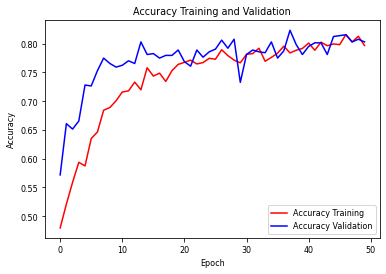

In [ ]:
plt.plot(w_op_history.history['accuracy'], 'r', label='Accuracy Training')
plt.plot(w_op_history.history['val_accuracy'], 'b', label='Accuracy Validation')
plt.title('Accuracy Training and Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.show()

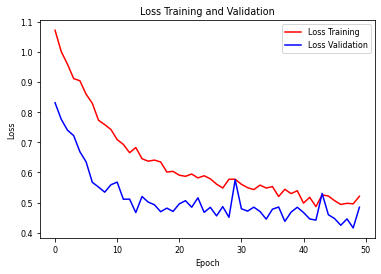

In [ ]:
# Plotting training loss and validation loss
plt.plot(w_op_history.history['loss'], 'r', label='Loss Training')
plt.plot(w_op_history.history['val_loss'], 'b', label='Loss Validation')
plt.title('Loss Training and Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.show()

In [ ]:
print('Batch size 32:')
w_model_op.evaluate(test_generator)

Batch size 32:
1/1 [==============================] - 10s 10s/step - loss: 0.8026 - accuracy: 0.7513


[0.8025702834129333, 0.7512500286102295]

In [ ]:
#@title Transfer Learning via Feature Extraction


In [ ]:
#@title VGG16


In [21]:
# Using builtin kerS VGG16 model

engine = tf.keras.applications.VGG16(
    
    # Freezing weights of layer 1 in VGG16 
    include_top = False,

    # Use weights of Imagenet
    weights = 'imagenet',

    # Defining input shape (224 x 224)
    input_shape = (img_height, img_width, 3),

    pooling = None
)


58900480/58889256 [==============================] - 1s 0us/step


In [24]:
# Falsifying first layer for pre training in VGG16
for layer in engine.layers:
    layer.trainable = False

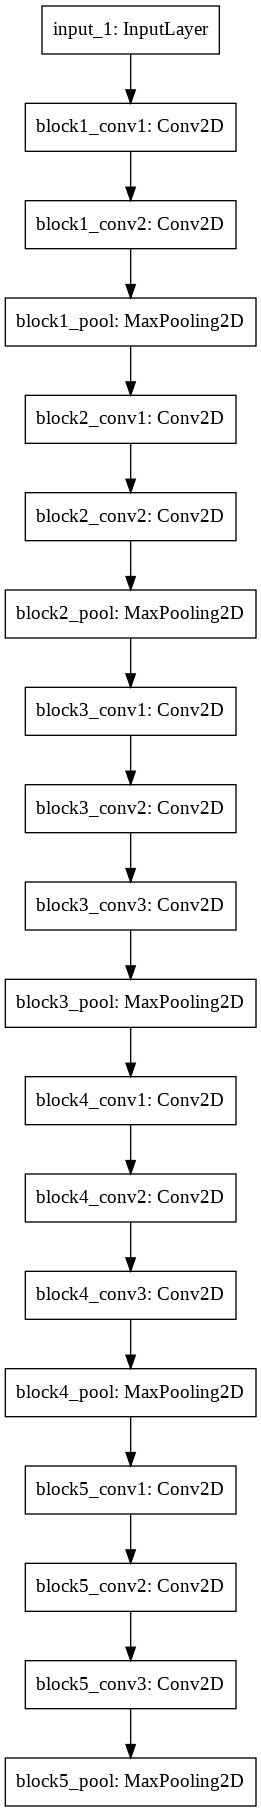

In [26]:
# Plotting VGG16 model
tf.keras.utils.plot_model(engine)

In [28]:
# Print summary of VGG16 model
engine.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [30]:
# Setting up model building with VGG16 as feature extractor
def engine_vgg16():
    keras.backend.clear_session()
    
    model = Sequential()
    
    # VGG16 feature extractor
    model.add(engine)
    
    # Flatten the output of convolutional layer
    model.add(Flatten())
    
    # Fully connected layer 1
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    
    # Fully connected layer 2   
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    
    # Fully connected layer 3
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    
    # Output layer
    model.add(Dense(4, activation='softmax'))
    
    return model

In [32]:
# Compile VGG16 model 
engine1_model_vgg = engine_vgg16()
engine1_model_vgg.compile(
    
    # Setting an optimizer
    optimizer = Adam(learning_rate=0.0001),

    # Setting Loss Function
    loss = 'categorical_crossentropy',

    # Setting metrics
    metrics = ['accuracy']
)


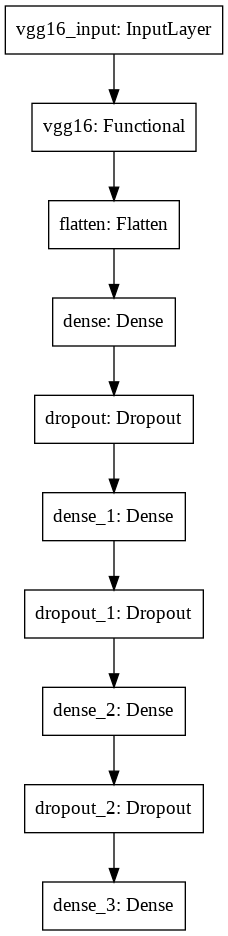

In [34]:
# Plotting new model VGG16
tf.keras.utils.plot_model(engine1_model_vgg)

In [36]:
# Build model Summary VGG16 
engine1_model_vgg.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8

In [38]:
# Run VGG16 Model
import math 
import time

#Setting up epochs
epochs = 32

print('-------------------Transfer Learning via VGG16----------------------')

Start = time.time()
engine1_history = engine1_model_vgg.fit(
    
    # Training Data generator
    w_train_generator,

    # steps per epoch 
    steps_per_epoch= math.ceil(w_train_generator.samples//batch_size),
    
    # Validation Data Generator
    validation_data = wo_validation_generator,

    # Putting up epochs                       
    epochs = epochs, 
    
    verbose=1)

Stop = time.time()
print('Time taken:',Stop - Start)

-------------------Transfer Learning via VGG16----------------------
Epoch 1/32
80/80 [==============================] - 1106s 14s/step - loss: 0.8638 - accuracy: 0.6293 - val_loss: 0.6032 - val_accuracy: 0.7875
Epoch 2/32
80/80 [==============================] - 551s 7s/step - loss: 0.6600 - accuracy: 0.7332 - val_loss: 0.4757 - val_accuracy: 0.7984
Epoch 3/32
80/80 [==============================] - 548s 7s/step - loss: 0.5973 - accuracy: 0.7594 - val_loss: 0.4234 - val_accuracy: 0.8484
Epoch 4/32
80/80 [==============================] - 544s 7s/step - loss: 0.5325 - accuracy: 0.7906 - val_loss: 0.3772 - val_accuracy: 0.8719
Epoch 5/32
80/80 [==============================] - 547s 7s/step - loss: 0.5012 - accuracy: 0.8059 - val_loss: 0.3484 - val_accuracy: 0.8797
Epoch 6/32
80/80 [==============================] - 546s 7s/step - loss: 0.4623 - accuracy: 0.8250 - val_loss: 0.3530 - val_accuracy: 0.8703
Epoch 7/32
80/80 [==============================] - 545s 7s/step - loss: 0.4437 - a

In [39]:
# Create a graph representing the loss of VGG16 Model

# Get loss data
lossG = engine1_history.history['loss']
accuracyG = engine1_history.history['accuracy']
epochs = [i for i in range(len(lossG))]

# Create graph
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x = epochs,
        y = lossG,
        name = 'Loss',
        marker = dict(
            color = 'rgba(250,50,50,1)'        
        )
    )
)

fig.add_trace(
    go.Scatter(
        x = epochs,
        y = accuracyG,
        name = 'Accuracy',
        marker = dict(
            color = 'rgba(50,250,50,1)'        
        )
    )
)

fig.update_layout(
    title = 'VGG16 Model loss',
    template = 'plotly_white'
)

fig.update_xaxes(
    title_text='Epochs'
)
fig.update_yaxes(
    title_text='Loss / Accuracy values'
)

fig.show()

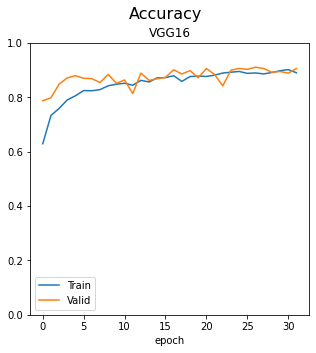

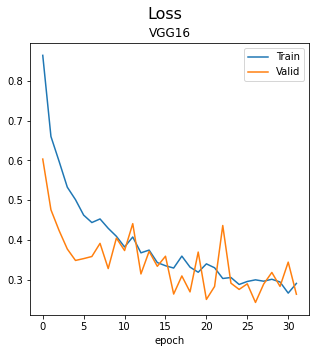

In [44]:
# Plotting accuracy of training and validation of VGG16 Model

# VGG16 History
model_vgg = [engine1_history]

# Print Label
model_vgg_l = ['VGG16']

# Graph Plot
compare(model_vgg, model_vgg_l)

In [ ]:
# Get x_test and y_test for VGG16
x_test_t1,y_test_t1 = next(test_generator)

In [51]:
test_vgg = engine1_model_vgg.predict(x_test_t1)

# Construct predicted y and actual y in python list for VGG16
y_pred_vgg = []

for i in range(len(test_vgg)):
    y_pred_vgg.append(np.argmax(test_vgg[i]))
y_act_vgg = []

for i in range(len(y_test_tl)):
    y_act_vgg.append(np.argmax(y_test_tl[i]))

In [52]:
# Demonstrate the confusion matrix of the predicted vs actual 
from sklearn import metrics

cm_vgg = metrics.confusion_matrix(y_act_vgg, y_pred_vgg)
print(cm_vgg,'\n')
print(metrics.classification_report(y_act_vgg, y_pred_vgg,target_names=cls))

[[173  27   0   0]
 [ 18 182   0   0]
 [ 10  52 138   0]
 [  1   1  28 170]] 

              precision    recall  f1-score   support

       Covid       0.86      0.86      0.86       200
      Normal       0.69      0.91      0.79       200
        Lung       0.83      0.69      0.75       200
       Viral       1.00      0.85      0.92       200

    accuracy                           0.83       800
   macro avg       0.85      0.83      0.83       800
weighted avg       0.85      0.83      0.83       800



In [ ]:
#@title Xception


In [58]:
# Creating ImageNet pretrained Xception as feature extractor
Engine_2 = tf.keras.applications.Xception(

              # Freezing weights of layer 1 for Xception
              include_top=False,
              
              # Using weights of imagenet
              weights='imagenet',
              
              # Image size
              input_shape=(img_height,img_width,3),
              
              pooling=None
              
              )

In [59]:
# Falsifying first layer for pre training in Xception
for layer in Engine_2.layers:
    layer.trainable = False

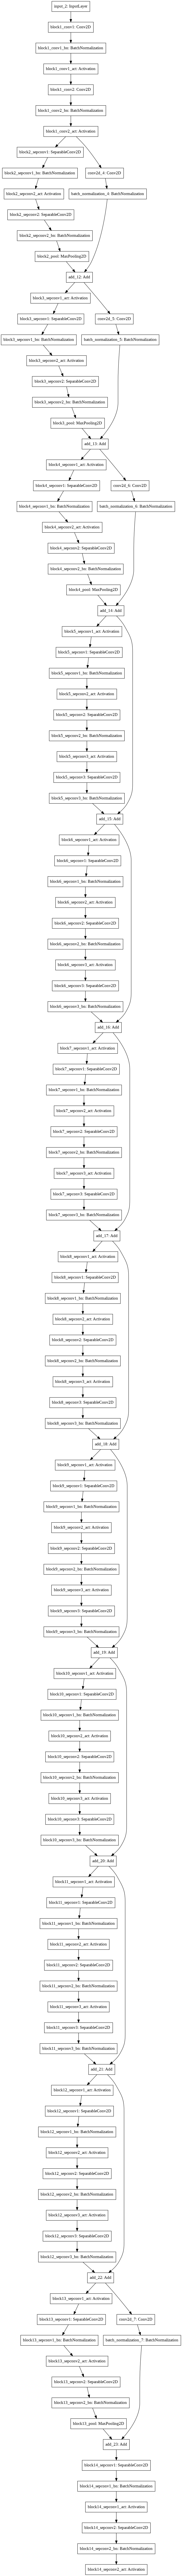

In [60]:
# Plotting Xception model
tf.keras.utils.plot_model(Engine_2)

In [61]:
# Print summary of Xception model
Engine_2.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [62]:
# Setting up model building with Xception as feature extractor
def Engine_Xception():
    keras.backend.clear_session()
    
    model = Sequential()
    
    # Xception feature extractor
    model.add(Engine_2)
    
    # Flatten the output of convolutional layer
    model.add(Flatten())
    
    # Fully connected layer 1
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    
    # Fully connected layer 2   
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    
    # Fully connected layer 3
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    
    # Output layer
    model.add(Dense(4, activation='softmax'))
    
    return model

In [63]:
# Compile Xception model
engine2_model = Engine_Xception()
engine2_model.compile(
    
    # Setting an optimizer
    optimizer = Adam(learning_rate=0.0001),

    # Setting Loss Function
    loss = 'categorical_crossentropy',

    # Setting metrics
    metrics = ['accuracy']
)

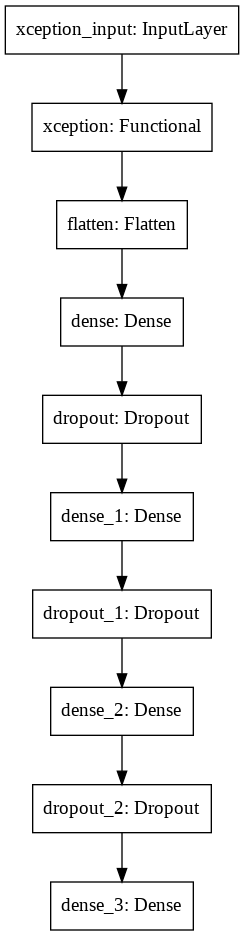

In [64]:
# Plotting new model Xception
tf.keras.utils.plot_model(engine2_model)

In [65]:
# Build model Summary Xception
engine2_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               25690368  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8

In [66]:
# Run Xception Model
import math 
import time

epochs = 32
print('-------------------Transfer Learning Xception----------------------')

Start = time.time()
engine2_history = engine2_model.fit(
    
    # Training Data generator
    w_train_generator,

    # steps per epoch 
    steps_per_epoch= math.ceil(w_train_generator.samples//batch_size),
    
    # Validation Data Generator
    validation_data = wo_validation_generator,

    # Putting up epochs                       
    epochs = epochs, 
    
    verbose=1)

Stop = time.time()
print('Time taken:',Stop - Start)

-------------------Transfer Learning Xception----------------------
Epoch 1/32
80/80 [==============================] - 280s 3s/step - loss: 0.7675 - accuracy: 0.6742 - val_loss: 0.6043 - val_accuracy: 0.7484
Epoch 2/32
80/80 [==============================] - 267s 3s/step - loss: 0.5620 - accuracy: 0.7672 - val_loss: 0.4609 - val_accuracy: 0.8062
Epoch 3/32
80/80 [==============================] - 251s 3s/step - loss: 0.5288 - accuracy: 0.7953 - val_loss: 0.5598 - val_accuracy: 0.7688
Epoch 4/32
80/80 [==============================] - 252s 3s/step - loss: 0.4794 - accuracy: 0.8125 - val_loss: 0.4410 - val_accuracy: 0.8000
Epoch 5/32
80/80 [==============================] - 256s 3s/step - loss: 0.4541 - accuracy: 0.8164 - val_loss: 0.5226 - val_accuracy: 0.7922
Epoch 6/32
80/80 [==============================] - 248s 3s/step - loss: 0.4716 - accuracy: 0.8191 - val_loss: 0.4902 - val_accuracy: 0.7937
Epoch 7/32
80/80 [==============================] - 250s 3s/step - loss: 0.4343 - accu

In [67]:
# Create a graph representing the loss of Xception Model

# Get loss data
lossG = engine2_history.history['loss']
accuracyG = engine2_history.history['accuracy']
epochs = [i for i in range(len(lossG))]

# Create graph
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x = epochs,
        y = lossG,
        name = 'Loss',
        marker = dict(
            color = 'rgba(250,50,50,1)'        
        )
    )
)

fig.add_trace(
    go.Scatter(
        x = epochs,
        y = accuracyG,
        name = 'Accuracy',
        marker = dict(
            color = 'rgba(50,250,50,1)'        
        )
    )
)

fig.update_layout(
    title = 'Xception Model Accuracy & loss',
    template = 'plotly_white'
)

fig.update_xaxes(
    title_text='Epochs'
)
fig.update_yaxes(
    title_text='Loss / Accuracy values'
)

fig.show()

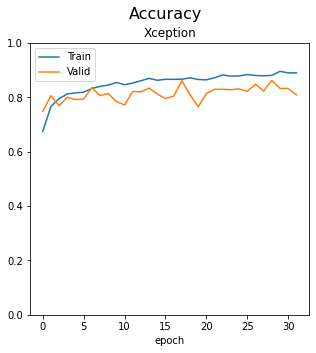

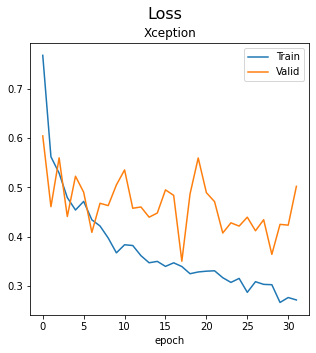

In [68]:
# Plotting accuracy and loss of training and validation of Xception Model

# VGG16 History
model_Xception = [engine2_history]

# Print Label
model_Xception_l = ['Xception']

# Graph Plot
compare(model_Xception, model_Xception_l)

In [75]:
# Get x_test and y_test for Xception
x_test_t2,y_test_t2 = next(test_generator)

In [76]:
test_Xception = engine2_model.predict(x_test_t2)

# Construct predicted y and actual y in python list
y_pred_Xception = []

for i in range(len(test_Xception)):
    y_pred_Xception.append(np.argmax(test_Xception[i]))
y_act_Xception = []

for i in range(len(y_test_t2)):
    y_act_Xception.append(np.argmax(y_test_t2[i]))

In [77]:
# Demonstrate the confusion matrix of the predicted vs actual for Xception Model 
from sklearn import metrics

cm_Xception = metrics.confusion_matrix(y_act_Xception, y_pred_Xception)
print(cm_Xception,'\n')
print(metrics.classification_report(y_act_Xception, y_pred_Xception,target_names=cls))

[[150  49   1   0]
 [ 18 176   3   3]
 [ 17  40 143   0]
 [  0   1  63 136]] 

              precision    recall  f1-score   support

       Covid       0.81      0.75      0.78       200
      Normal       0.66      0.88      0.76       200
        Lung       0.68      0.71      0.70       200
       Viral       0.98      0.68      0.80       200

    accuracy                           0.76       800
   macro avg       0.78      0.76      0.76       800
weighted avg       0.78      0.76      0.76       800

